# Question 1 - Extracting Tesla Stock Data Using yfinance

In [13]:
import yfinance as yf
tesla = yf.Ticker("TSLA")

In [122]:
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [123]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import warnings
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [124]:
soup = BeautifulSoup(html_data, 'html5')

In [125]:
tesla_revenue = pd.DataFrame(columns={'Date', 'Revenue'})

In [126]:
for row in soup.find("tbody").find_all('tr'):
    cols = row.find_all('td')
    date = cols[0].text
    value = cols[1].text
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":value}, ignore_index=True)
    warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

In [129]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue
9,2013,2013
10,2012,413
11,2011,204
12,2010,117
13,2009,112


# Question 3 - Extracting GameStop Stock Data Using yfinance

In [81]:
import yfinance as yf
gme = yf.Ticker("GME")

In [82]:
gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [89]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import warnings
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

In [111]:
soup = BeautifulSoup(html_data, 'html5')
gamestop_revenue = pd.DataFrame(columns={"Date", "Revenue"})

In [112]:
for row in soup.find("tbody").find_all('tr'):
    cols = row.find_all('td')
    date = cols[0].text
    value = cols[1].text
    gamestop_revenue = gamestop_revenue.append({"Date":date, "Revenue":value}, ignore_index=True)
    warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

In [130]:
gamestop_revenue["Revenue"] = gamestop_revenue['Revenue'].str.replace(',|\$',"")
gamestop_revenue.dropna(inplace=True)
gamestop_revenue = gamestop_revenue[gamestop_revenue['Revenue'] != ""]
gamestop_revenue.tail()

,Date,Revenue
9,2013,8887
10,2012,9551
11,2011,9474
12,2010,9078
13,2009,8806


# Question 5 - Tesla Stock and Revenue Dashboard

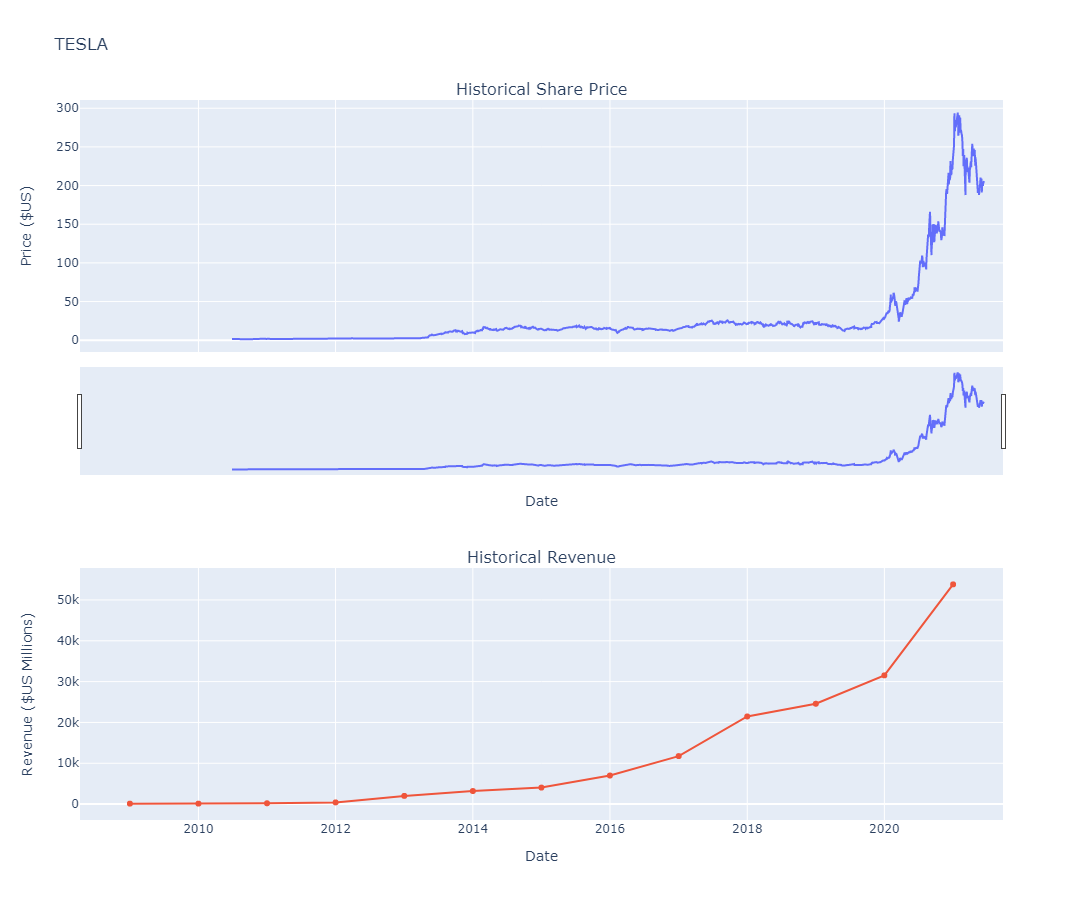

In [134]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
make_graph(tesla_data, tesla_revenue, 'TESLA')

# Question 6 - GameStop Stock and Revenue Dashboard

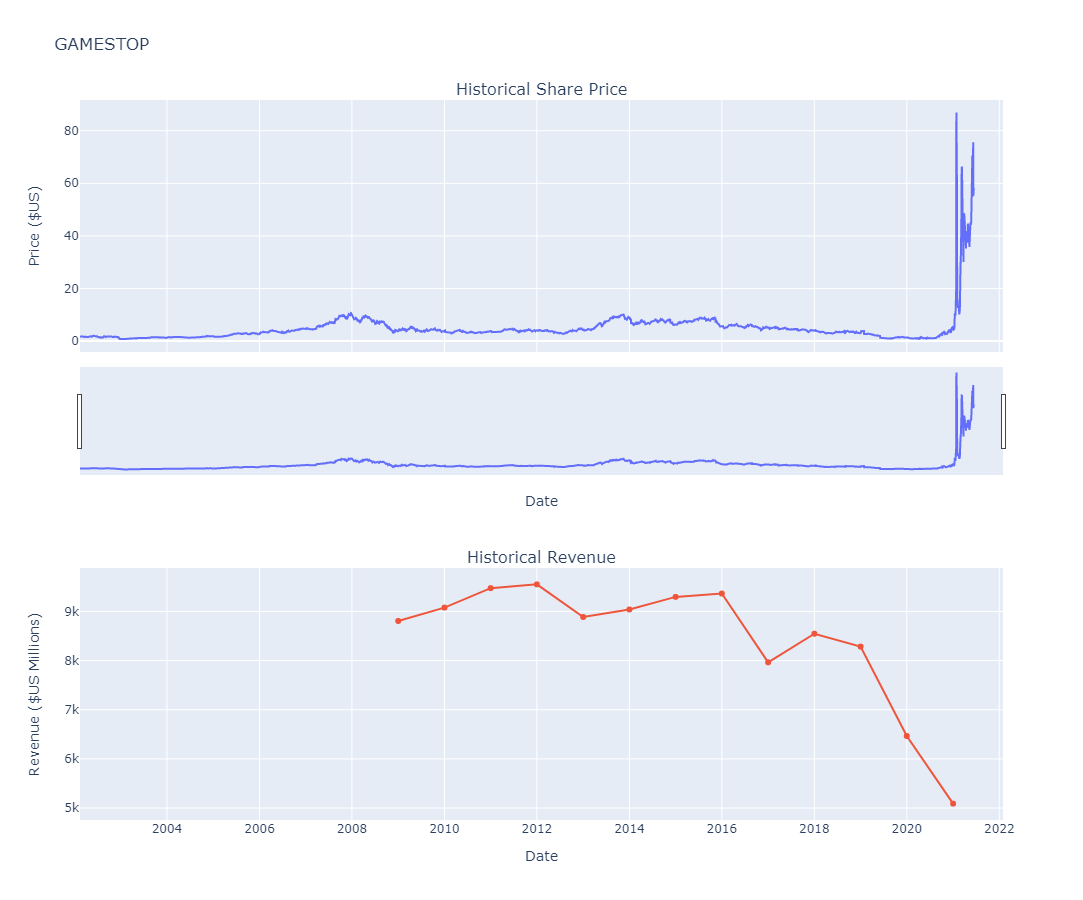

In [121]:
make_graph(gme_data, gamestop_revenue, "GAMESTOP")